# 7. Diversity analysis - Preprocessing & Rarefaction

In [1]:
# Load diversity libraries
library(tidyverse)
library(data.table)
library(reshape2)
library(ggplot2)
library(RColorBrewer)
library(vegan) 
library(phyloseq) 
library(dplyr) 
library(ggpubr) 
library(Hmisc) 
library(corrplot)
library(scales)
library(broom)
library(ecodist) 
library(rstatix)
library(multcompView)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:

In [2]:
# Set seed and your working directory
set.seed(1234) # for reproducibility of random processes
setwd("~/Documents/Collaborations/sinusite_edwin/data/")

In [3]:
# Loading frequency table with taxonomic annotation 
ReadCounts_TaxAnnotation <- read.delim("./ReadCounts_TaxAnnotation_SILVA.tsv", h=T) 
head(ReadCounts_TaxAnnotation)

,ID_Sample,id,count,Kingdom,Phylum,Class,Order,Family,Genus,Species,⋯,Sex,Age,Atopic_Symptoms,Asthma,NSAID_Intolerance,Total_IgE,Blood_Eosinophilia,Tissue_Eosinophilia,Final_LundMackay,AlignmentEfficiency
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>
1,0001967K_T1,AB646616,1,Bacteria,Bacillota,Bacilli,Staphylococcales,Staphylococcaceae,Staphylococcus,Staphylococcus saccharolyticus,⋯,1,58.7,1,1,0,38,100,10,15,99.85097
2,0001967K_T1,AF015929,4,Bacteria,Bacillota,Bacilli,Staphylococcales,Staphylococcaceae,Staphylococcus,Staphylococcus aureus,⋯,1,58.7,1,1,0,38,100,10,15,99.85097
3,0001967K_T1,AGEF01000005,1,Bacteria,Bacillota,Bacilli,Lactobacillales,Carnobacteriaceae,Dolosigranulum,Dolosigranulum pigrum ATCC 51524,⋯,1,58.7,1,1,0,38,100,10,15,99.85097
4,0001967K_T1,AIYD01000002,2,Bacteria,Bacillota,Bacilli,Staphylococcales,Staphylococcaceae,Staphylococcus,Staphylococcus aureus M1016,⋯,1,58.7,1,1,0,38,100,10,15,99.85097
5,0001967K_T1,AJ439343,1,Bacteria,Actinomycetota,Actinobacteria,Mycobacteriales,Corynebacteriaceae,Corynebacterium,Corynebacterium pseudodiphtheriticum,⋯,1,58.7,1,1,0,38,100,10,15,99.85097
6,0001967K_T1,AJ938182,1,Bacteria,Bacillota,Bacilli,Staphylococcales,Staphylococcaceae,Staphylococcus,Staphylococcus aureus RF122,⋯,1,58.7,1,1,0,38,100,10,15,99.85097


In [7]:
# Preprocessing  
df <- aggregate(ReadCounts_TaxAnnotation$count, 
      list(ReadCounts_TaxAnnotation$Genus, ReadCounts_TaxAnnotation$ID_Sample), # groups the data by Genus and ID_Sample
      FUN=sum) # calculate total reads per genus in each sample
head(df)

colnames(df) <- c("Genus", "ID_Sample", "Counts") # asigns names to cols
cast_data = acast(df, ID_Sample ~ Genus) # transform df into a wide-format matrix; rows represent samples, and columns represent Genus
cast_data[is.na(cast_data)] <- 0 # Replacing missing values (NA) with zeros
head(cast_data)

,Group.1,Group.2,x
,<chr>,<chr>,<int>
1,Amaricoccus,0001967K_T1,1
2,Corynebacterium,0001967K_T1,1
3,Dolosigranulum,0001967K_T1,1
4,Klebsiella,0001967K_T1,1
5,Leuconostoc,0001967K_T1,1
6,Noviherbaspirillum,0001967K_T1,1


Using Counts as value column: use value.var to override.



,[Enterobacter],[Eubacterium] sulci group,[Eubacterium] yurii group,[Ruminococcus] gnavus group,Abiotrophia,Acetoanaerobium,Achromobacter,Acidaminococcus,Acidibacter,Acidiferrimicrobium,⋯,Veillonella,Vibrio,Virgibacillus,W5053,Williamsia,Xanthobacter,Xenorhabdus,Xylophilus,Yersinia,Yokenella
0001967K_T1,0,0,0,0,0,0,0,0,0,0,⋯,39,0,0,0,0,0,0,0,0,0
0001967K_T3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0001967K_T6,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0088303G_T0,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0088303G_T1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0088303G_T3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


Rarefaction depth: 74 


png 
  3

pdf 
  2

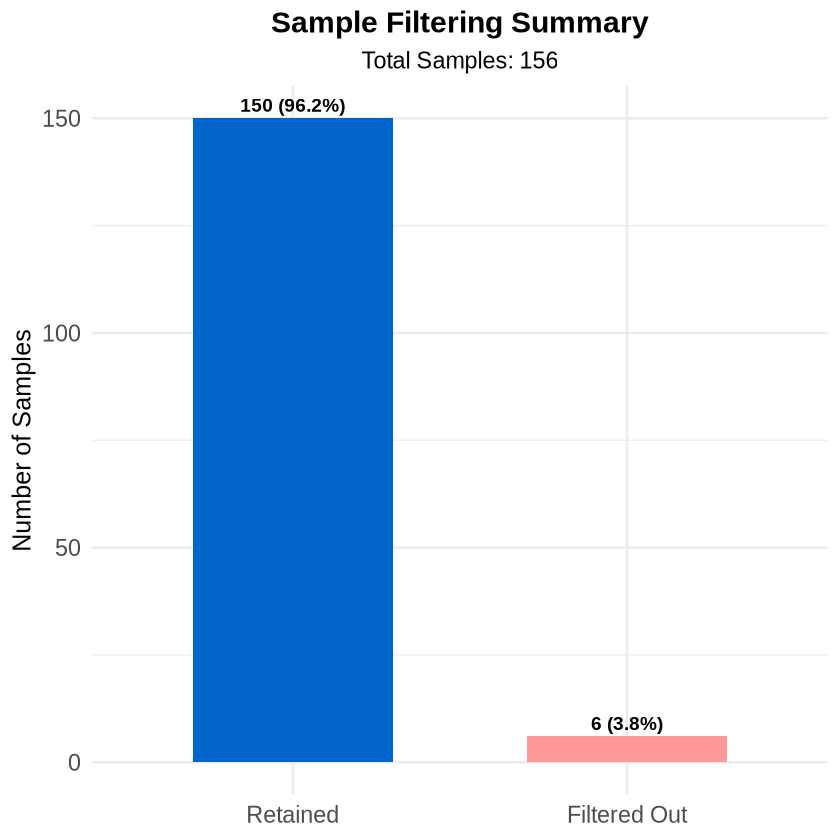

In [8]:
## Computing rarefaction depth
### Computes the total number of reads per sample and finds the sample with the lowest sequencing depth (used for rarefaction)
raremax <- min(rowSums(cast_data)) 
cat("Rarefaction depth:", raremax, "\n") 

## Compute total reads per sample
total_reads <- rowSums(cast_data)

## Count number of samples before and after filtering
samples_before <- nrow(cast_data)
samples_after <- sum(total_reads >= 1000)
samples_removed <- samples_before - samples_after

## Create a df for plotting
filter_summary <- data.frame(
  Category = c("Retained", "Filtered Out"),
  Sample_Count = c(samples_after, samples_removed)
)

## Compute percentage and plot 
filter_summary$Percentage <- (filter_summary$Sample_Count / samples_before) * 100

ggplot(filter_summary, aes(x = reorder(Category, -Sample_Count), y = Sample_Count, fill = Percentage)) +
  geom_bar(stat = "identity", width = 0.6, show.legend = FALSE) +
  geom_text(aes(label = paste0(Sample_Count, " (", round(Percentage, 1), "%)")),
            vjust = -0.5, size = 4, fontface = "bold") +
  scale_fill_gradient(low = "#FF9999", high = "#0066CC") +
  theme_minimal(base_size = 15) +
  labs(title = "Sample Filtering Summary",
       subtitle = paste("Total Samples:", samples_before),
       x = NULL, y = "Number of Samples") +
  theme(plot.title = element_text(face = "bold", hjust = 0.5, size = 18),
        plot.subtitle = element_text(hjust = 0.5, size = 14),
        axis.text = element_text(size = 14))

# Save the plot as a PNG file
dev.copy(png, filename = "sample_filt_summary.png", width = 1600, height = 1600, res = 300)
dev.off()  # Close the PNG device

In [9]:
## Filter out samples with fewer than 1000 reads and remove those samples from metadata
filtered_cast_data <- cast_data[total_reads >= 1000, ]
metadata <- read.delim("./metadata_full_clean.tsv", h=T)
metadata_filtered <- metadata %>% filter(ID_Sample %in% rownames(filtered_cast_data))
metadata_filtered <- metadata_filtered[!duplicated(metadata_filtered$ID_Sample), ] # ensures no duplicate files are used in downstream processing
head(filtered_cast_data)
head(metadata_filtered)

,[Enterobacter],[Eubacterium] sulci group,[Eubacterium] yurii group,[Ruminococcus] gnavus group,Abiotrophia,Acetoanaerobium,Achromobacter,Acidaminococcus,Acidibacter,Acidiferrimicrobium,⋯,Veillonella,Vibrio,Virgibacillus,W5053,Williamsia,Xanthobacter,Xenorhabdus,Xylophilus,Yersinia,Yokenella
0001967K_T1,0,0,0,0,0,0,0,0,0,0,⋯,39,0,0,0,0,0,0,0,0,0
0001967K_T3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0001967K_T6,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0088303G_T0,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0088303G_T1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0088303G_T3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


,ID_Sample,SNOT22,SNOT22nasal,LK_Total,LK_Secret,ClinicCtrl,AntUse,Cortuse,Patient,Filename,⋯,Timepoint,Sex,Age,Atopic_Symptoms,Asthma,NSAID_Intolerance,Total_IgE,Blood_Eosinophilia,Tissue_Eosinophilia,Final_LundMackay
,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<chr>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>
1,0001967K_T1,38,12,4,2,NC,1,1,0001967K,0001967K_T1.fastq,⋯,T1,1,58.7,1,1,0,38,100,10,15
2,0001967K_T3,96,26,10,4,NC,1,0,0001967K,0001967K_T3.fastq,⋯,T3,1,58.7,1,1,0,38,100,10,15
3,0001967K_T6,79,19,6,4,NC,1,1,0001967K,0001967K_T6.fastq,⋯,T6,1,58.7,1,1,0,38,100,10,15
4,0088303G_T0,102,37,8,2,NC,NA,0,0088303G,0088303G_T0.fastq,⋯,T0,2,60.3,1,1,0,667,800,58,22
5,0088303G_T1,32,7,4,1,NC,1,0,0088303G,0088303G_T1.fastq,⋯,T1,2,60.3,1,1,0,667,800,58,22
6,0088303G_T3,NA,NA,NA,NA,NA,0,0,0088303G,0088303G_T3.fastq,⋯,T3,2,60.3,1,1,0,667,800,58,22


In [10]:
length(unique(metadata_filtered$ID_Sample))

[1] 150

In [11]:
# Rarefaction
raremax = 1000 # rarefy to a decent sequence depth 
rarefied_data <- rrarefy(filtered_cast_data, raremax)
head(rarefied_data)

,[Enterobacter],[Eubacterium] sulci group,[Eubacterium] yurii group,[Ruminococcus] gnavus group,Abiotrophia,Acetoanaerobium,Achromobacter,Acidaminococcus,Acidibacter,Acidiferrimicrobium,⋯,Veillonella,Vibrio,Virgibacillus,W5053,Williamsia,Xanthobacter,Xenorhabdus,Xylophilus,Yersinia,Yokenella
0001967K_T1,0,0,0,0,0,0,0,0,0,0,⋯,9,0,0,0,0,0,0,0,0,0
0001967K_T3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0001967K_T6,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0088303G_T0,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0088303G_T1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0088303G_T3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


png 
  3

pdf 
  2

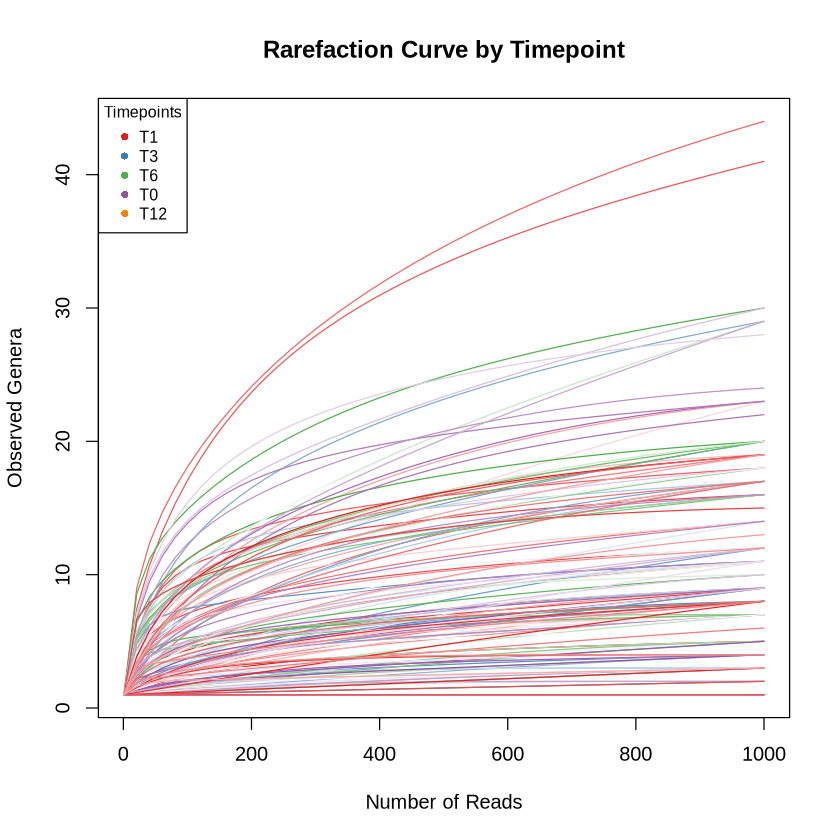

In [12]:
## Process rarefied data to plot - by Timepoint
timepoints <- metadata_filtered$Timepoint  # Extract timepoint data
names(timepoints) <- metadata_filtered$ID_Sample  # Assign sample IDs as names for easy mapping
timepoint_colors <- brewer.pal(length(unique(timepoints)), "Set1") # Define a distinct base color for each timepoint
names(timepoint_colors) <- unique(timepoints)  # Assign timepoint labels to colors

### Generate gradient shades for each sample within a timepoint; samples from the same timepoint share a color gradient
sample_colors <- sapply(timepoints, function(tp) {
  colorRampPalette(c(timepoint_colors[tp], "white"))(length(which(timepoints == tp)))
})
sample_colors <- unlist(sample_colors, use.names = FALSE) # Flatten the list into a vector so that each sample has a unique color

### Plot the rarefaction curves
par(mfrow = c(1,1))  # Ensures all curves are in one plot
rarecurve(rarefied_data, 
          step = 20,  # Defines step size for plotting (adjustable)
          col = sample_colors,  # Assigns colors to each sample based on timepoint
          label = FALSE,  # Removes sample labels from the plot to avoid clutter
          main = "Rarefaction Curve by Timepoint",  # Title of the plot
          xlab = "Number of Reads",  # X-axis label
          ylab = "Observed Genera")  # Y-axis label
#### Add a legend to associate colors with timepoints
legend("topleft", 
       legend = names(timepoint_colors),  # Labels for timepoints
       col = timepoint_colors,  # Corresponding colors
       cex = 0.8,
       pch = 16,  # Point style
       title = "Timepoints")  # Title for the legend

# Save the plot as a PNG file
dev.copy(png, filename = "rarefaction_curve.png", width = 1800, height = 1200, res = 300)
dev.off()  # Close the PNG device

png 
  3

pdf 
  2

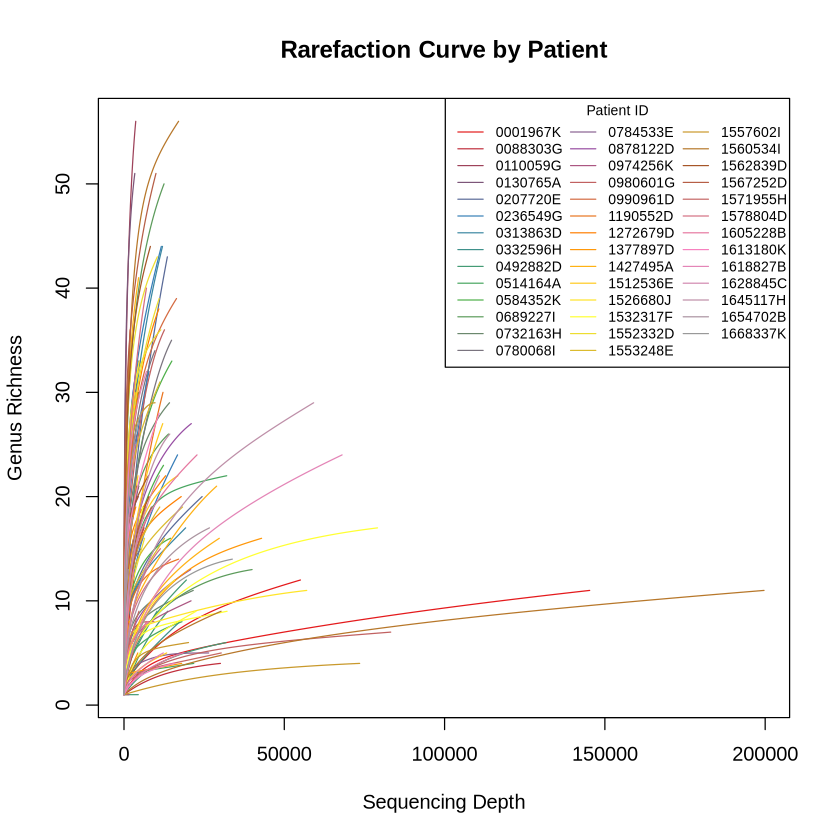

In [13]:
## Process rarefied data to plot - by Patient
### Extract patient information
patients <- metadata_filtered$Patient

### Ensure sample IDs are correctly assigned
names(patients) <- metadata_filtered$ID_Sample

### Check if patients vector was created correctly
if (is.null(patients)) {
  stop("Error: 'Patient' column not found in metadata. Please check column names.")
}

### Generate a unique color for each patient
num_patients <- length(unique(patients))
patient_colors <- colorRampPalette(brewer.pal(9, "Set1"))(num_patients)
names(patient_colors) <- unique(patients)

### Assign colors to samples based on patient ID
sample_colors <- sapply(patients, function(pt) patient_colors[pt])
sample_colors <- unlist(sample_colors, use.names = FALSE)

### Impose rarefaction depth
raremax <- 900  # Rarefaction depth

### Plot rarefaction curves
par(mfrow = c(1, 1))  # Ensure a single plot panel
rarecurve(filtered_cast_data, step = 20, col = sample_colors, lty = 1, label = FALSE, ylab = "Genus Richness", xlab = "Sequencing Depth", main = "Rarefaction Curve by Patient")

### Add legend (ensuring all patients are included)
legend("topright", legend = unique(patients), col = patient_colors, lty = 1, cex = 0.7, ncol = 3, title = "Patient ID")

# Save the plot as a PNG file
dev.copy(png, filename = "rarefaction_curve2.png", width = 1700, height = 1200, res = 200)
dev.off()  # Close the PNG device

In [14]:
write.table(rarefied_data, "rarefied_data.tsv", quote = F, sep = "\t", row.names = T)
write.table(metadata_filtered, "metadata_filtered_Diversity.tsv", quote = F, sep = "\t", row.names = T)